In [1]:
# Cleaned up Dataset location
fileName = "https://library.startlearninglabs.uw.edu/DATASCI410/Datasets/Automobile%20price%20data%20_Raw_.csv"

In [2]:
# Import libraries
import pandas as pd
#saving the file into pandas dataframe
auto = pd.read_csv(fileName)

In [3]:
auto.columns = ["symboling","normalized-losses","make","fuel-type","aspiration","num-of-doors","body-style","drive-wheels","engine-location","wheel-base","length","width","height","curb-weight","engine-type","num-of-cylinders","engine-size","fuel-system","bore","stroke","compression-ratio","horsepower","peak-rpm","city-mpg","highway-mpg","price"]

In [4]:
#dropping column with several missing values
del auto['normalized-losses']

In [5]:
#replacing missing values with NaN
auto = auto.replace(to_replace= '?', value = float("NaN"))

In [6]:
#evaluating NaN
auto.isnull().sum()

symboling            0
make                 0
fuel-type            0
aspiration           0
num-of-doors         2
body-style           0
drive-wheels         0
engine-location      0
wheel-base           0
length               0
width                0
height               0
curb-weight          0
engine-type          0
num-of-cylinders     0
engine-size          0
fuel-system          0
bore                 4
stroke               4
compression-ratio    0
horsepower           2
peak-rpm             2
city-mpg             0
highway-mpg          0
price                4
dtype: int64

In [7]:
#removing rows with NaN 
autodata = auto.dropna(axis=0)

In [8]:
autodata.isnull().sum()

symboling            0
make                 0
fuel-type            0
aspiration           0
num-of-doors         0
body-style           0
drive-wheels         0
engine-location      0
wheel-base           0
length               0
width                0
height               0
curb-weight          0
engine-type          0
num-of-cylinders     0
engine-size          0
fuel-system          0
bore                 0
stroke               0
compression-ratio    0
horsepower           0
peak-rpm             0
city-mpg             0
highway-mpg          0
price                0
dtype: int64

In [9]:
#reinding after dropping na 
autodata.reset_index()

,index,symboling,make,fuel-type,aspiration,num-of-doors,body-style,drive-wheels,engine-location,wheel-base,...,engine-size,fuel-system,bore,stroke,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg,price
0,0,3,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.00,111,5000,21,27,13495
1,1,3,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.00,111,5000,21,27,16500
2,2,1,alfa-romero,gas,std,two,hatchback,rwd,front,94.5,...,152,mpfi,2.68,3.47,9.00,154,5000,19,26,16500
3,3,2,audi,gas,std,four,sedan,fwd,front,99.8,...,109,mpfi,3.19,3.40,10.00,102,5500,24,30,13950
4,4,2,audi,gas,std,four,sedan,4wd,front,99.4,...,136,mpfi,3.19,3.40,8.00,115,5500,18,22,17450
5,5,2,audi,gas,std,two,sedan,fwd,front,99.8,...,136,mpfi,3.19,3.40,8.50,110,5500,19,25,15250
6,6,1,audi,gas,std,four,sedan,fwd,front,105.8,...,136,mpfi,3.19,3.40,8.50,110,5500,19,25,17710
7,7,1,audi,gas,std,four,wagon,fwd,front,105.8,...,136,mpfi,3.19,3.40,8.50,110,5500,19,25,18920
8,8,1,audi,gas,turbo,four,sedan,fwd,front,105.8,...,131,mpfi,3.13,3.40,8.30,140,5500,17,20,23875
9,10,2,bmw,gas,std,two,sedan,rwd,front,101.2,...,108,mpfi,3.50,2.80,8.80,101,5800,23,29,16430


In [10]:
#categorial variable. Checking for possible cats
autodata.loc[:,'fuel-type'].unique()


array(['gas', 'diesel'], dtype=object)

In [11]:
autodata.dtypes

symboling              int64
make                  object
fuel-type             object
aspiration            object
num-of-doors          object
body-style            object
drive-wheels          object
engine-location       object
wheel-base           float64
length               float64
width                float64
height               float64
curb-weight            int64
engine-type           object
num-of-cylinders      object
engine-size            int64
fuel-system           object
bore                  object
stroke                object
compression-ratio    float64
horsepower            object
peak-rpm              object
city-mpg               int64
highway-mpg            int64
price                 object
dtype: object

C:\Users\T\Anaconda3\lib\site-packages\ipykernel_launcher.py:11: FutureWarning: specifying 'categories' or 'ordered' in .astype() is deprecated; pass a CategoricalDtype instead
  # This is added back by InteractiveShellApp.init_path()
C:\Users\T\Anaconda3\lib\site-packages\ipykernel_launcher.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  # This is added back by InteractiveShellApp.init_path()


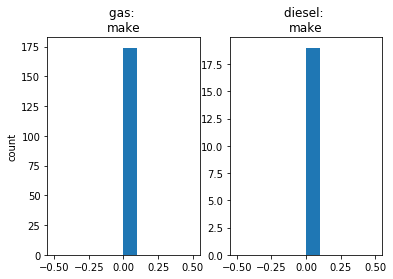

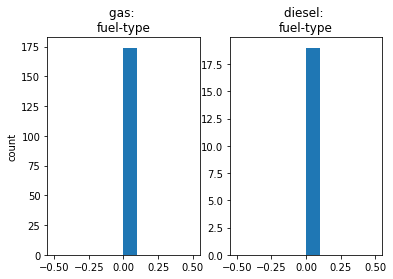

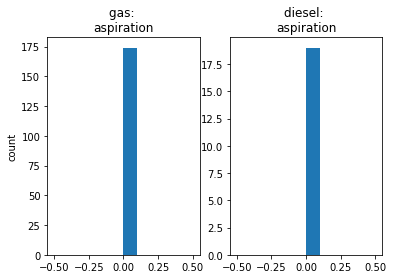

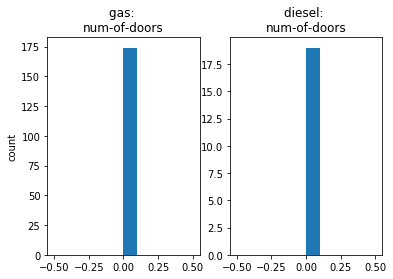

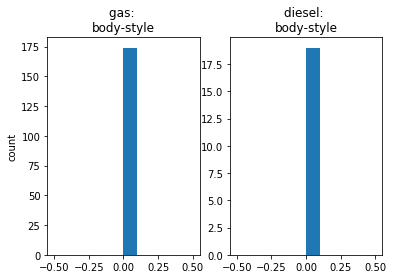

In [12]:
# Let's also convert our dataframe columns to "category" type to take advantage
# categorical utilities like facet-based plotting in seaborn
import pandas
import numpy
import seaborn
from matplotlib import pyplot

%matplotlib inline

autodata['fuel-type'] = autodata['fuel-type'].astype('object').astype(
    'category', categories=['gas', 'diesel'])
values = ['gas', 'diesel']

#for c in autodata.columns:
   # if autodata[c].dtype == 'object':
       # autodata[c] = autodata[c].astype('category', categories=values)

gas = autodata[autodata['fuel-type'] == 'gas']
diesel = autodata[autodata['fuel-type'] == 'diesel']
for autodata_col in autodata.columns[1:6]:
    pyplot.subplot(1, 2, 1)
    pyplot.hist([1 if x == 'y' else 0 for x in gas[autodata_col]])
    pyplot.title('gas: \n' + autodata_col)
    pyplot.ylabel('count')
    pyplot.subplot(1, 2, 2)
    pyplot.hist([1 if x == 'y' else 0 for x in diesel[autodata_col]])
    pyplot.title('diesel: \n' + autodata_col)
    pyplot.show()


In [13]:
#categorizing label
labels = autodata['fuel-type'].cat.codes


In [1]:
labels

NameError: name 'labels' is not defined

In [14]:
#feature selection
autodata1 = autodata[['wheel-base', 'engine-size', 'wheel-base', 'compression-ratio', 'city-mpg', 'highway-mpg', 'price']]


In [15]:
autodata1.dtypes

wheel-base           float64
engine-size            int64
wheel-base           float64
compression-ratio    float64
city-mpg               int64
highway-mpg            int64
price                 object
dtype: object

In [16]:
#updating data type for modeling
autodata1['price'] = pd.to_numeric(autodata1['price'])

C:\Users\T\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


In [17]:
#creating array
feature_vecs = autodata1.as_matrix() 


C:\Users\T\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
  """Entry point for launching an IPython kernel.


In [18]:
autodata1

,wheel-base,engine-size,wheel-base,compression-ratio,city-mpg,highway-mpg,price
0,88.6,130,88.6,9.00,21,27,13495
1,88.6,130,88.6,9.00,21,27,16500
2,94.5,152,94.5,9.00,19,26,16500
3,99.8,109,99.8,10.00,24,30,13950
4,99.4,136,99.4,8.00,18,22,17450
5,99.8,136,99.8,8.50,19,25,15250
6,105.8,136,105.8,8.50,19,25,17710
7,105.8,136,105.8,8.50,19,25,18920
8,105.8,131,105.8,8.30,17,20,23875
10,101.2,108,101.2,8.80,23,29,16430


In [19]:
import sklearn.naive_bayes

# Define the model
model = sklearn.naive_bayes.MultinomialNB(alpha=1e-7)
# Train the model with our votes dataset
model.fit(feature_vecs, labels)

MultinomialNB(alpha=1e-07, class_prior=None, fit_prior=True)

In [22]:
#prediction vs actual
predicted_fueltype = model.predict(feature_vecs)
fueltype_probabilities = model.predict_proba(feature_vecs)

results = pandas.DataFrame({
        'Ftype': autodata['fuel-type'],
        'predicted': pandas.Categorical.from_codes(
            predicted_fueltype, autodata['fuel-type'].cat.categories),
        'proba(gas)': fueltype_probabilities[:, 0],
        'proba(diesel)': fueltype_probabilities[:, 1],
    })
results

,Ftype,predicted,proba(gas),proba(diesel)
0,gas,gas,9.809321e-01,1.906793e-02
1,gas,diesel,6.792124e-03,9.932079e-01
2,gas,diesel,4.486596e-01,5.513404e-01
3,gas,gas,9.299990e-01,7.000102e-02
4,gas,diesel,2.833911e-02,9.716609e-01
5,gas,gas,9.554297e-01,4.457027e-02
6,gas,diesel,7.995029e-02,9.200497e-01
7,gas,diesel,2.382895e-03,9.976171e-01
8,gas,diesel,3.315079e-10,1.000000e+00
10,gas,diesel,2.229363e-02,9.777064e-01


In [29]:
import sklearn.metrics

def confusion_matrix(labels, predicted_labels, label_classes):
    return pandas.DataFrame(
        sklearn.metrics.confusion_matrix(labels, predicted_labels),
        index=[label_classes], 
        columns=label_classes)    
 
def performance(results):
    accuracy = sklearn.metrics.accuracy_score(
        results['Ftype'].cat.codes, results['predicted'].cat.codes)
    precision = sklearn.metrics.precision_score(
            results['Ftype'].cat.codes, results['predicted'].cat.codes)
    recall = sklearn.metrics.recall_score(
            results['Ftype'].cat.codes, results['predicted'].cat.codes)

    print('Accuracy = %.3f, Precision = %.3f, Recall = %.3f' % (accuracy, precision, recall))
    
    return confusion_matrix(
        results['Ftype'], 
        results['predicted'], 
        results.Ftype.cat.categories)

In [30]:
performance(results)

Accuracy = 0.751, Precision = 0.204, Recall = 0.526


,gas,diesel
gas,10,9
diesel,39,135


In [ ]:
# the accuracy is promissing but poor precison. can't compare with regression as i did not use this categorical variable as a label before. 